In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.__version__

red_wine = pd.read_csv('red_wine.csv')
red_wine.drop(columns={'Unnamed: 0'}, inplace=True)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_train = red_wine.sample(frac=0.7,random_state=42)
df_valid = red_wine.drop(df_train.index)

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)

y_train = df_train['quality']
y_valid = df_valid['quality']

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
model = keras.Sequential([
        # First layer
        layers.Dense(units=128, activation='relu', input_shape=[11]),
        # Add dropout 
        layers.Dropout(0.3),
        # Add Batch Normalization
        layers.BatchNormalization(),
        # Second Layer
        layers.Dense(units=128,activation='relu'),
        # Add droput
        layers.Dropout(0.4),
        # Add Batch Normalization
        layers.BatchNormalization(),
        # Add Final layer
        layers.Dense(units=1),
    
])

In [41]:
model.compile(
            optimizer='adam',
            loss='mae',
)

In [42]:
history = model.fit(
                    X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    batch_size=128,
                    epochs=100,
                    verbose=0,
)

In [43]:
history_df = pd.DataFrame(history.history)

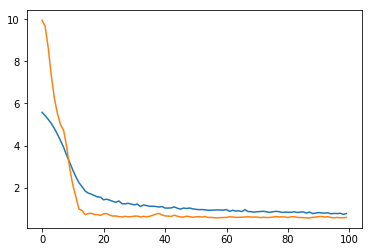

In [44]:
plt.plot(history_df.loc[:,['loss','val_loss']]);

<p> <h2> Testing with Spotify dataset </h2> </p>

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow.keras import callbacks

In [65]:
spotify = pd.read_csv('spotify.csv')
spotify.drop(columns={'Unnamed: 0'}, inplace=True)
spotify.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [66]:
X = spotify.copy().dropna()
y = X.pop('track_popularity')

artists = X['track_artist']

feature_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']

feature_cat = ['playlist_genre']

preprocessor = make_column_transformer(
                (StandardScaler(),feature_num),
                (OneHotEncoder(),feature_cat),
)


def group_split(X,y,group,train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X,y,groups=group))
    return (X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X,y,artists)



In [67]:
print(X_train.shape,y_train.shape)

(24706, 22) (24706,)


In [68]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.fit_transform(X_valid)

y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input Shape : {}".format(input_shape))

Input Shape : [18]


In [69]:
model = keras.Sequential([
            # First layer
            layers.Dense(units=128, activation='relu', input_shape=input_shape),
            # Add Dropout
            layers.Dropout(0.3),
            # Second Layer
            layers.Dense(units=64, activation='relu'),
            # Second Dropout
            layers.Dropout(0.3),
            # Final layer
            layers.Dense(units=1),
])

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(
        optimizer='adam',
        loss='mae',
        metrics=['mse','mae'],
)

In [72]:
history = model.fit(
                    X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    batch_size=512,
                    epochs=100,
                    verbose=0,
)

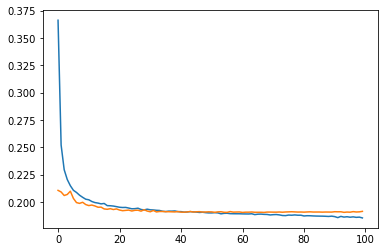

In [73]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[0:,['loss','val_loss']])
plt.show()

In [74]:
concrete = pd.read_csv('concrete.csv')
concrete.drop(columns={'Unnamed: 0'}, inplace=True)

In [75]:
df = concrete.copy()

In [76]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [77]:
df_train = df.sample(frac=0.7,random_state=121)
df_valid = df.drop(df_train.index)
df_test = df_valid.sample(frac=0.4,random_state=121)


In [78]:
print(df_train.shape,df_valid.shape,df_test.shape)

(721, 9) (309, 9) (124, 9)


In [79]:
X_train = df_train.drop('CompressiveStrength',axis=1)
X_valid = df_valid.drop('CompressiveStrength',axis=1)

y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

In [80]:
input_shape = [X_train.shape[1]]

In [81]:
model = keras.Sequential([
        # First layer
        layers.Dense(units=512,activation='relu',input_shape=input_shape),
        # Second layer
        layers.Dense(units=512, activation='relu'),
        # Third layer
        layers.Dense(units=512,activation='relu'),
        # Final layer
        layers.Dense(units=1),
    
    
    
])

In [82]:
model.compile(
            optimizer='sgd',
            loss = 'mae',
            metrics=['mae'],
)

In [83]:
history = model.fit(
                    X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    epochs = 100,
                    batch_size=64,
                    verbose=0,
)

In [84]:
history_df = pd.DataFrame(history.history)

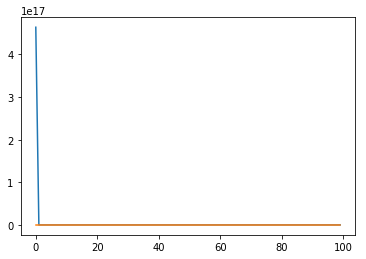

In [87]:
plt.plot(history_df.loc[0:,['loss','val_loss']])
plt.show()